In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats

Zeby wygenerowac szereg czasowy z bibl. pandas i z wbudowanych funkcji wyliczyc srednią, min , max i och, stand w tym szeregu

In [4]:
# time = pd.date_range(start='2021-04-01', end='2021-05-01', freq='D')
time = pd.Series([10,12,16,12,40,16,37,28,19,50,38,60,37,94,62,4,18,39,95,82])

In [5]:
average = time.mean()
min = time.min()
max = time.max()
median = time.median()
# df = pd.DataFrame(time)
# std = df.std(axis = 0, skipna = True)
std = time.std()

print(f'average: {average}\nmin: {min}\nmax: {max}\nmedian: {median}\nstd: {std}')

average: 38.45
min: 4
max: 95
median: 37.0
std: 27.766839366788805


In [6]:
windowFrame = time.rolling(window=4).mean()
print(f'windowFrame:\n{windowFrame}')

windowFrame:
0       NaN
1       NaN
2       NaN
3     12.50
4     20.00
5     21.00
6     26.25
7     30.25
8     25.00
9     33.50
10    33.75
11    41.75
12    46.25
13    57.25
14    63.25
15    49.25
16    44.50
17    30.75
18    39.00
19    58.50
dtype: float64


### Znajdywanie danych odstających

### Wersja 1

In [7]:
odstajace = []
for i in range(len(time)):
    if time.median() + 1*time.std() < abs(time[i]):
        odstajace.append(time[i])
print(odstajace)
print(len(odstajace))

[94, 95, 82]
3


### Wersja 2

In [8]:
filtered = time[(np.abs(stats.zscore(time)) < 1)]
print(filtered)

# ts.interpolate(method='cubic')            # ktos tak miał

1     12
2     16
3     12
4     40
5     16
6     37
7     28
8     19
9     50
10    38
11    60
12    37
14    62
16    18
17    39
dtype: int64


Zadanie domowe: Podminic te wartosci odstajace na takie ok, srednie. itp, INTERPOLACJA

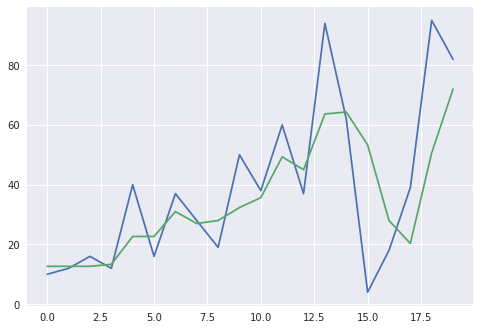

In [17]:
with plt.style.context('seaborn'): 
    time.plot()
    time.rolling(window=3).mean().fillna(method='backfill').plot()

In [33]:
timeDays = pd.date_range(start='2021-04-01', end='2021-05-01', freq='H')
x = np.round(np.random.normal(loc=0, scale=1, size=timeDays.size).cumsum(axis=0),2)
df = pd.DataFrame(data=x, index=timeDays, columns=['x'])

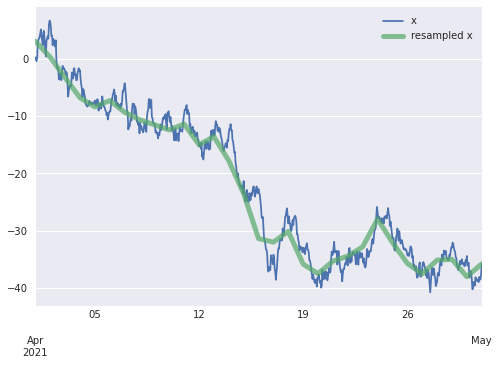

In [34]:
with plt.style.context('seaborn'): 
    df['x'].plot()
    df['x'].resample('D').mean().plot(linewidth=5, alpha=0.7)
    plt.legend(['x', 'resampled x', 'moving average'])